# CAPSTONE PROJECT - EDA

imports

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz

positive outcomes definition

In [102]:
positive_outcomes = ['Community resolution',
'Khat or Cannabis warning',
'Caution (simple or conditional)',
'Arrest',
'Penalty Notice for Disorder',
'Summons / charged by post',
'Suspect arrested',
'Suspect summoned to court',
]

check data 

In [103]:
data = pd.read_csv('./data/train.csv')

In [104]:
data.head(5)

,observation_id,Type,Date,Part of a policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,station
0,2e4d0094-c30b-471b-a211-72a9790feca2,Person search,2020-12-01T01:10:00+00:00,NaN,50.798824,-1.089471,Male,25-34,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Community resolution,False,False,hampshire
1,4779fbe8-6e05-4534-85fd-db32952ee309,Person search,2020-12-01T02:00:00+00:00,NaN,50.785099,-1.091540,Male,over 34,White - Any other White background,Other,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,hampshire
2,cb5c685d-acac-42e2-914d-75e6ff73b0a8,Person search,2020-12-01T09:15:00+00:00,NaN,50.952006,-1.403341,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,True,hampshire
3,f486e116-5b1e-45db-9931-a7f070c5c478,Person search,2020-12-01T10:20:00+00:00,NaN,50.806383,-1.079844,Male,10-17,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,False,hampshire
4,78f4020e-12cc-4889-bf1a-2f2c29b2f662,Person search,2020-12-01T10:24:00+00:00,NaN,50.806670,-1.081982,Male,10-17,Other ethnic group - Not stated,Asian,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False,hampshire


Counting entries and non-null values

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856610 entries, 0 to 856609
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   observation_id                            856610 non-null  object 
 1   Type                                      856610 non-null  object 
 2   Date                                      856610 non-null  object 
 3   Part of a policing operation              646620 non-null  object 
 4   Latitude                                  700308 non-null  float64
 5   Longitude                                 700308 non-null  float64
 6   Gender                                    856610 non-null  object 
 7   Age range                                 856610 non-null  object 
 8   Self-defined ethnicity                    841427 non-null  object 
 9   Officer-defined ethnicity                 856610 non-null  object 
 10  Legislation         

Fixing Outcome linked to object of search null values

In [106]:
data['Outcome linked to object of search'] = data['Outcome linked to object of search'].fillna(False)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856610 entries, 0 to 856609
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   observation_id                            856610 non-null  object 
 1   Type                                      856610 non-null  object 
 2   Date                                      856610 non-null  object 
 3   Part of a policing operation              646620 non-null  object 
 4   Latitude                                  700308 non-null  float64
 5   Longitude                                 700308 non-null  float64
 6   Gender                                    856610 non-null  object 
 7   Age range                                 856610 non-null  object 
 8   Self-defined ethnicity                    841427 non-null  object 
 9   Officer-defined ethnicity                 856610 non-null  object 
 10  Legislation         

Exploring possible outcome values

In [108]:
pd.Series(data.Outcome.unique())

0               Community resolution
1       A no further action disposal
2                             Arrest
3          Summons / charged by post
4    Caution (simple or conditional)
5        Penalty Notice for Disorder
6           Khat or Cannabis warning
dtype: object

In [109]:
data['Outcome linked to object of search']

0         False
1         False
2         False
3         False
4         False
          ...  
856605     True
856606     True
856607     True
856608     True
856609     True
Name: Outcome linked to object of search, Length: 856610, dtype: bool

In [110]:
data.groupby(['Outcome', 
            'Outcome linked to object of search'])['observation_id'].count().unstack()

Outcome linked to object of search,False,True
Outcome,,
A no further action disposal,582321,45153
Arrest,80876,30872
Caution (simple or conditional),994,2265
Community resolution,48140,20140
Khat or Cannabis warning,2417,9279
Penalty Notice for Disorder,16084,1235
Summons / charged by post,10218,6616


In [111]:
data['positive_outcomes'] = data['Outcome'].apply(lambda val: True if val in positive_outcomes else False)

In [112]:
data.groupby(['positive_outcomes', 
            'Outcome linked to object of search'])['observation_id'].count().unstack()

Outcome linked to object of search,False,True
positive_outcomes,,
False,582321,45153
True,158729,70407


check what stations have positive_outcomes=False and Outcome linked to object of search	= True

In [113]:
percent_data_false_outcomes_linked = (data.loc[(data['Outcome linked to object of search']) & (~data['positive_outcomes']), 'station'].value_counts()/data.station.value_counts()).fillna(0).sort_values(ascending=False)

<AxesSubplot:title={'center':'Outcomes linked to objective of search when outcome is negative'}, xlabel='station name', ylabel='percentage of negative outcomes linked to objective of search'>

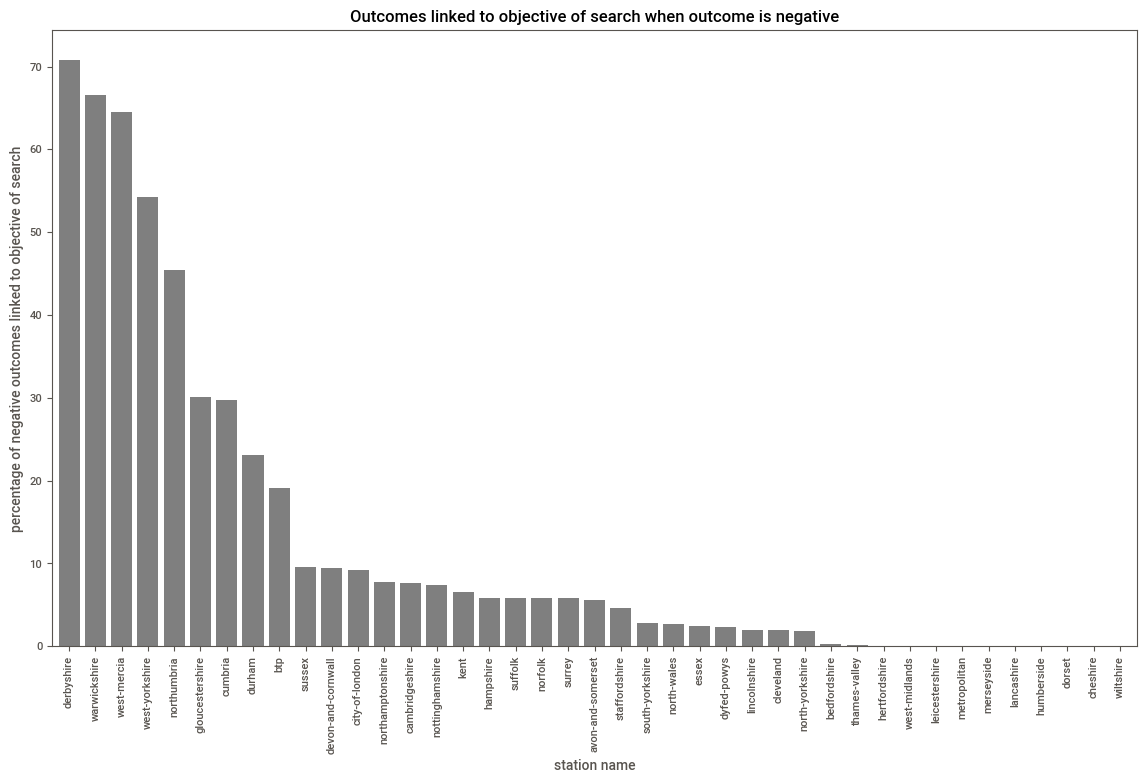

In [114]:
(100*percent_data_false_outcomes_linked).plot(kind='bar', color='black', figsize=(14,8), alpha=0.5, width=0.8, xlabel='station name', ylabel='percentage of negative outcomes linked to objective of search', title='Outcomes linked to objective of search when outcome is negative')

Drop this values from the dataset since it's data entry errors

In [115]:
data = data.loc[~((data['Outcome linked to object of search']) & (~data['positive_outcomes']))]

In [118]:
data.groupby(['positive_outcomes', 
            'Outcome linked to object of search'])['observation_id'].count().unstack()

Outcome linked to object of search,False,True
positive_outcomes,,
False,582321.0,NaN
True,158729.0,70407.0


create basic EDA

                                             |          | [  0%]   00:00 -> (? left)


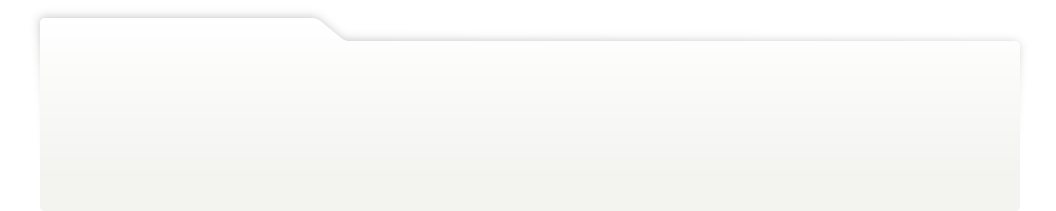
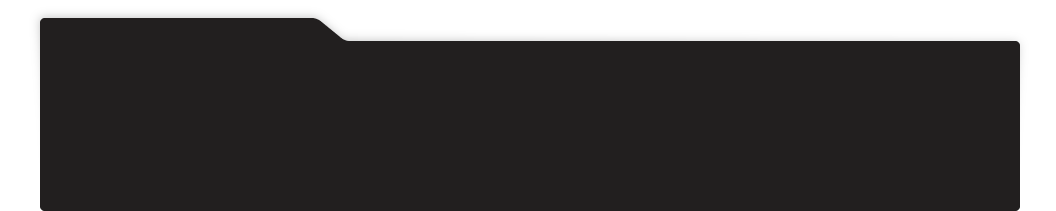
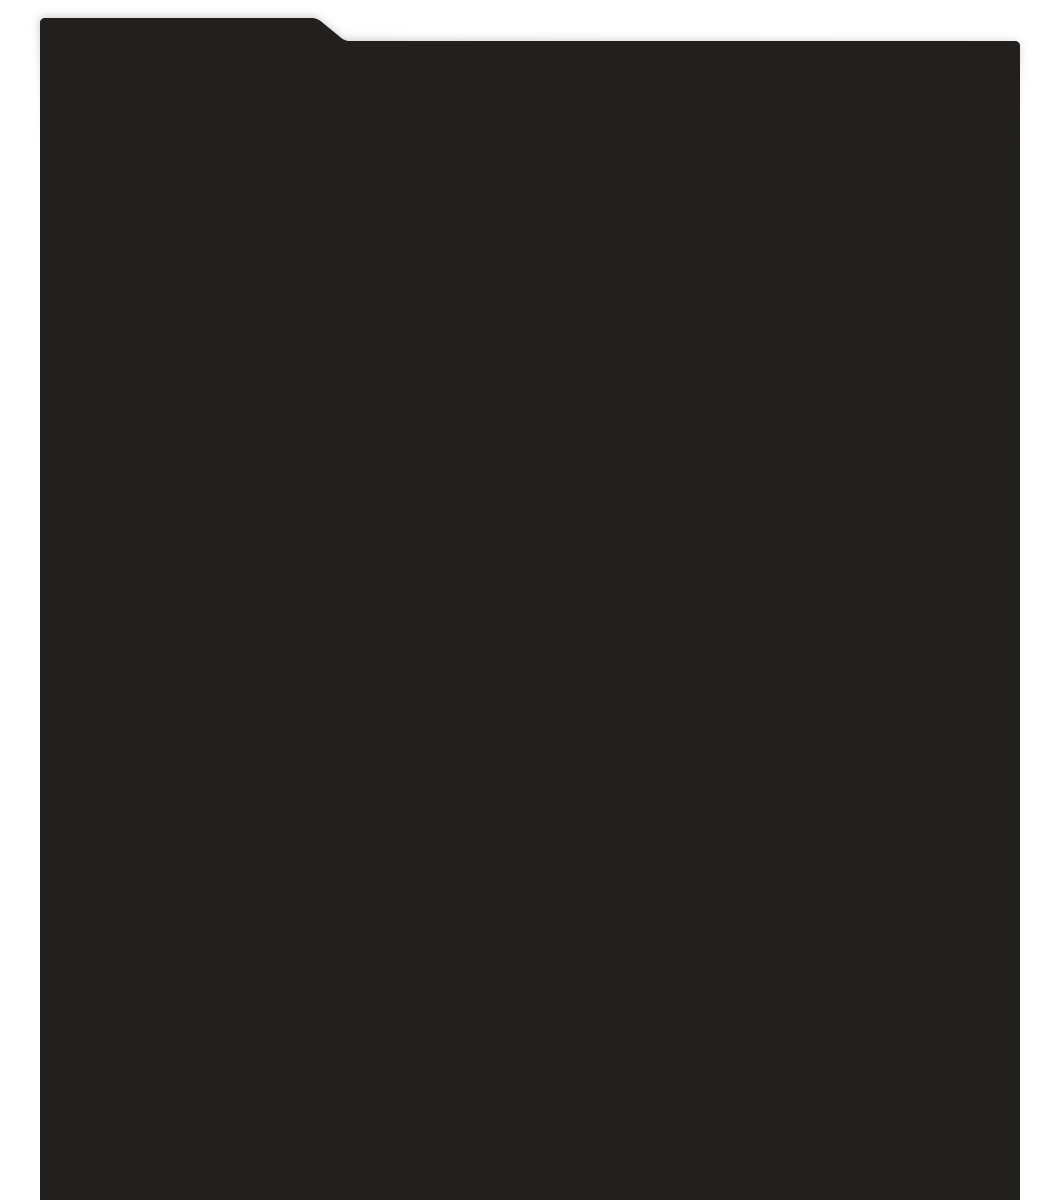
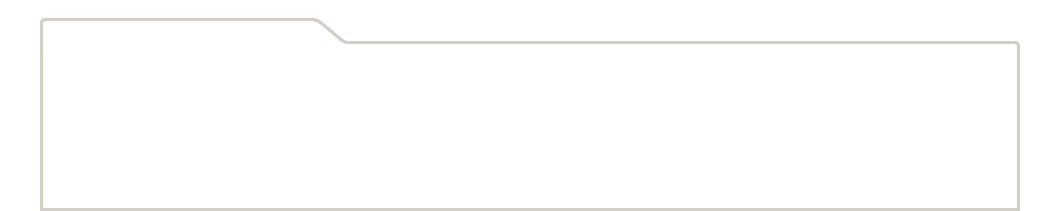
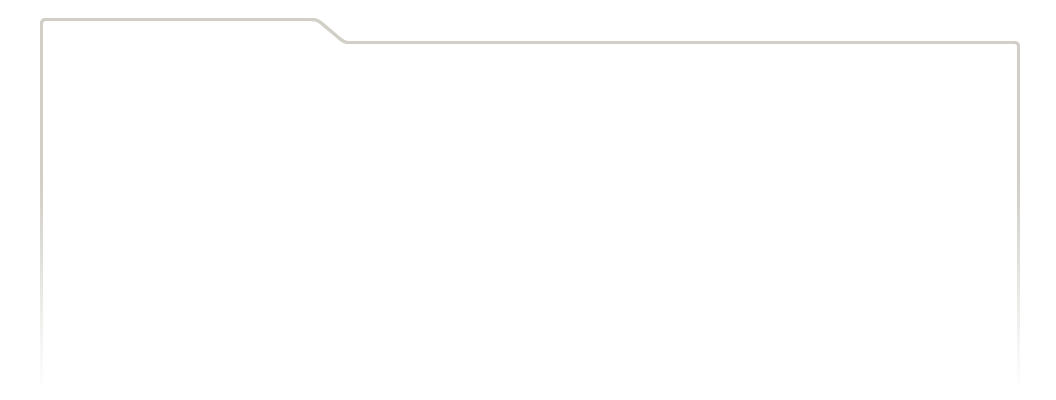
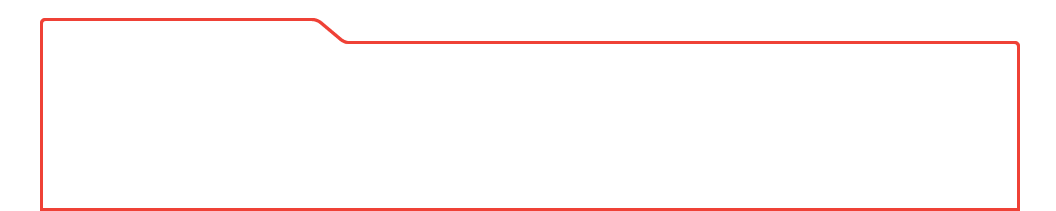
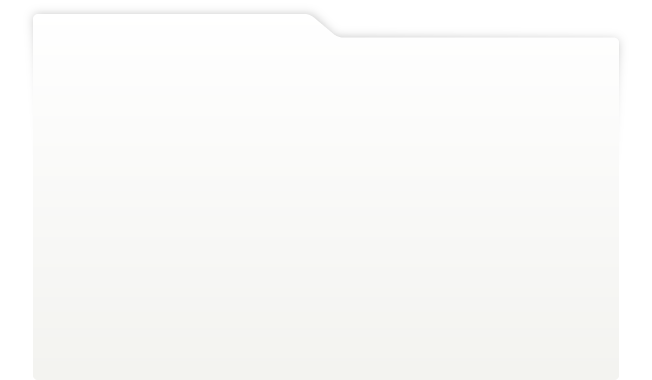
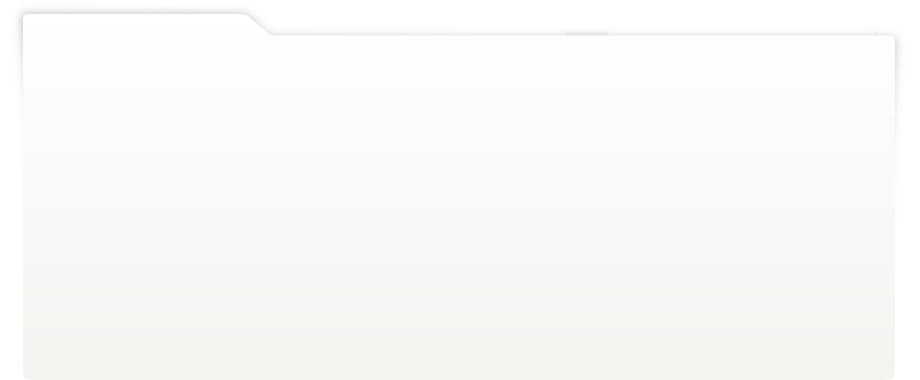
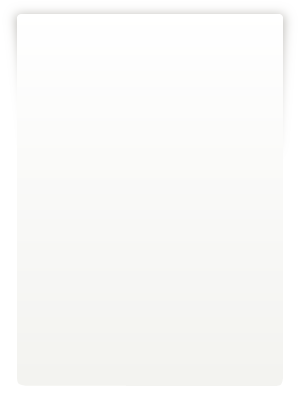
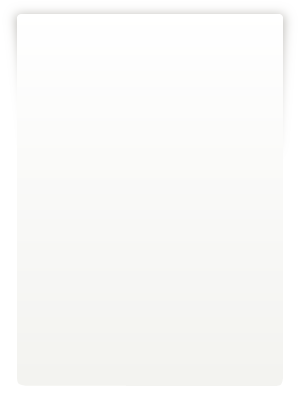
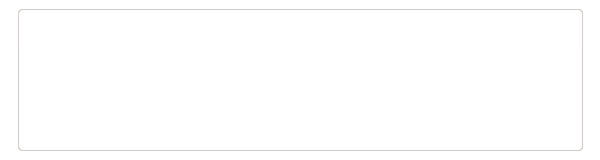
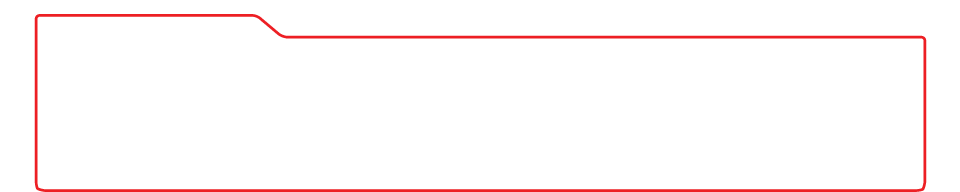
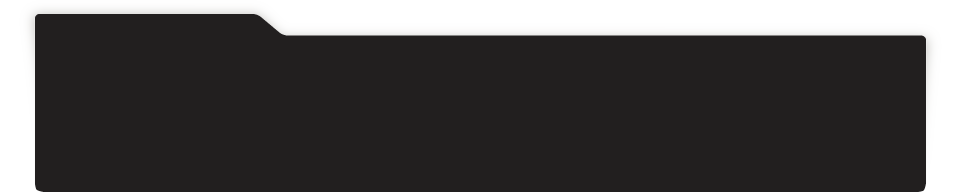
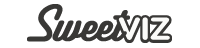
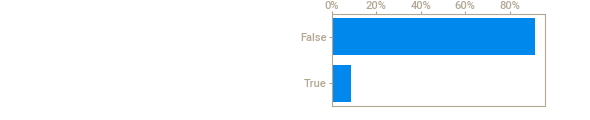
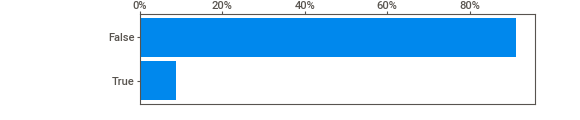
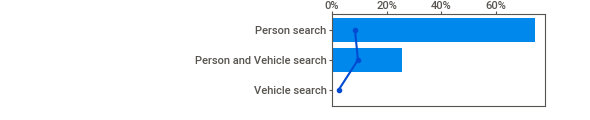
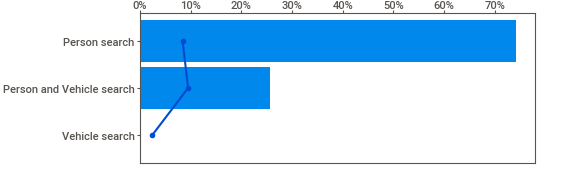
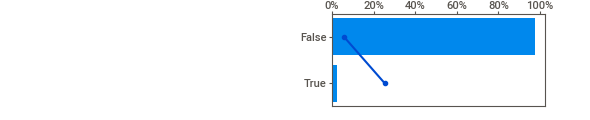
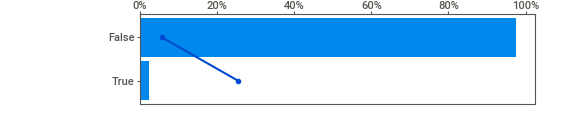
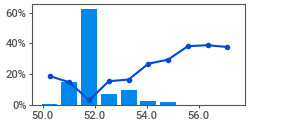
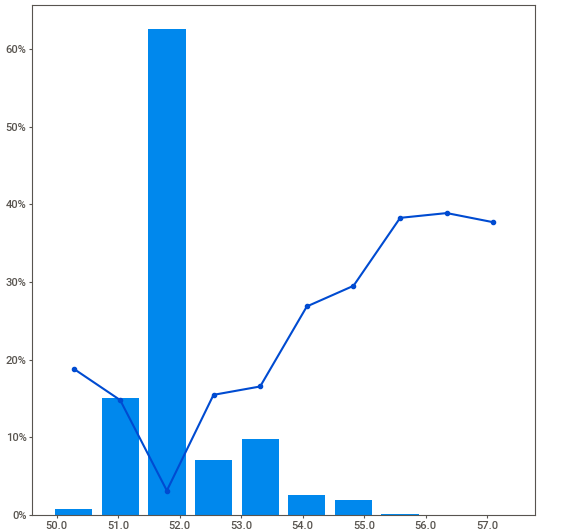
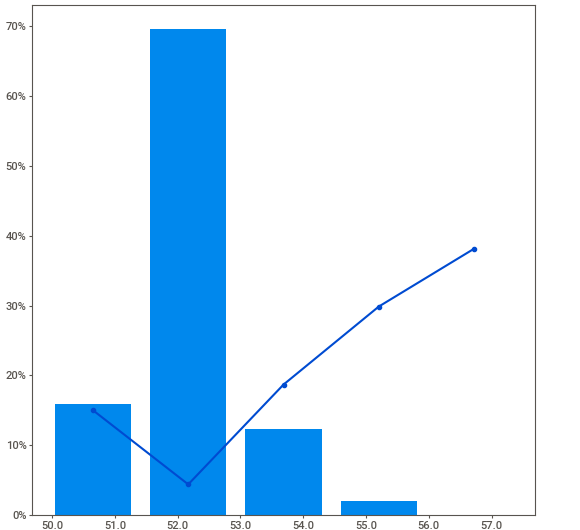
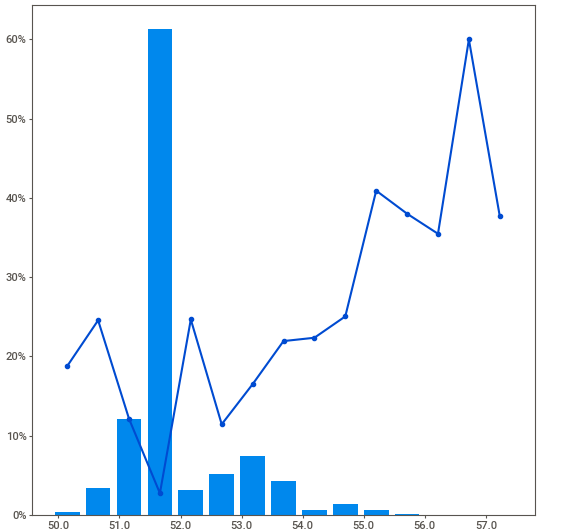
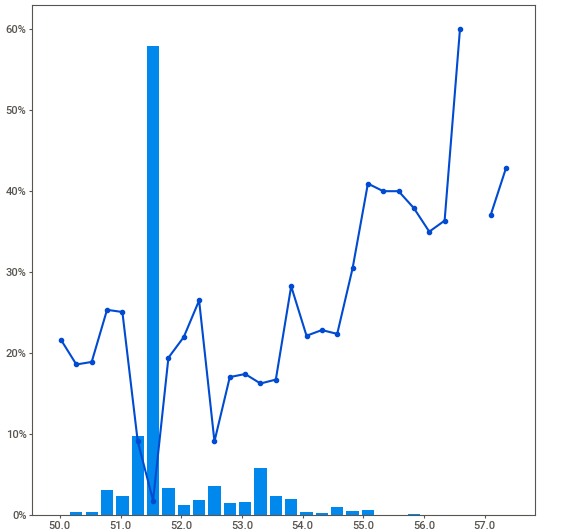
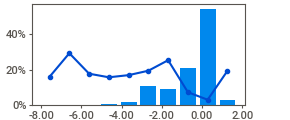
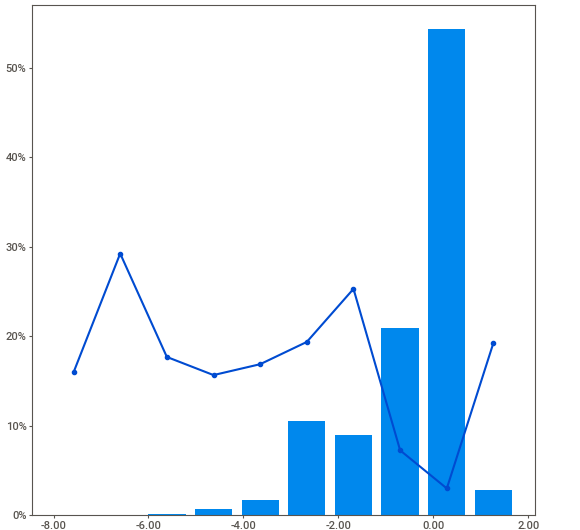
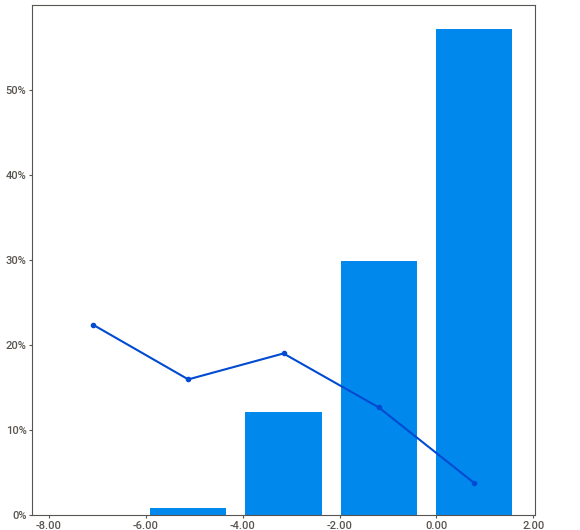
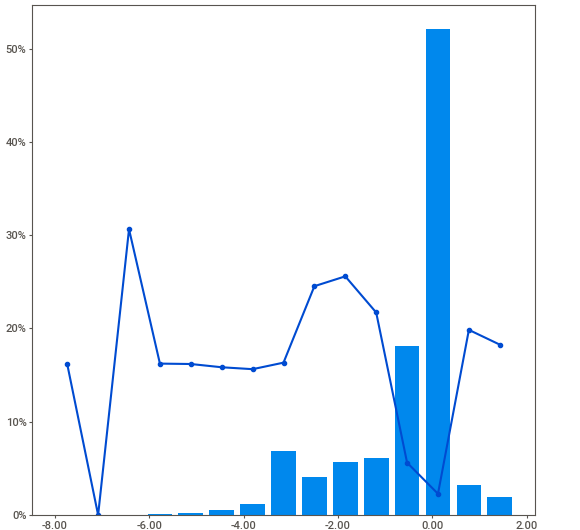
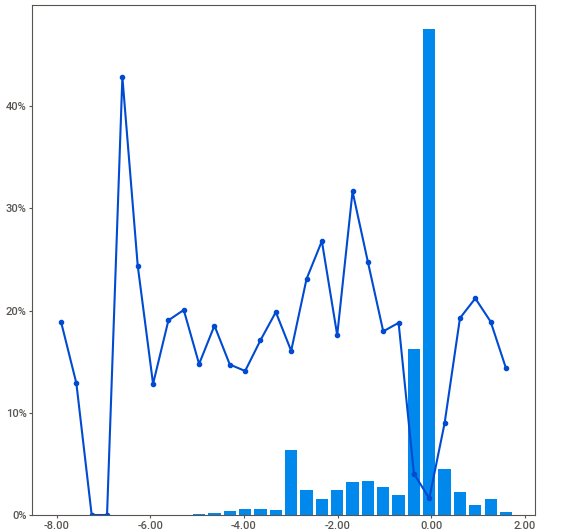
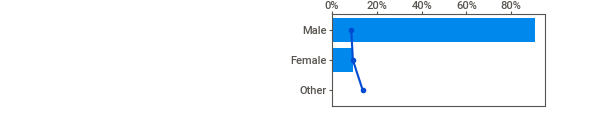
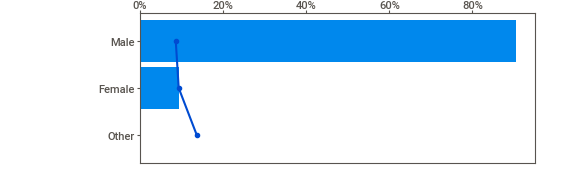
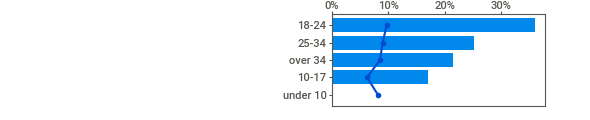
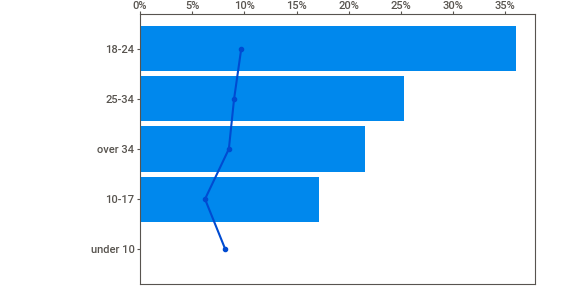
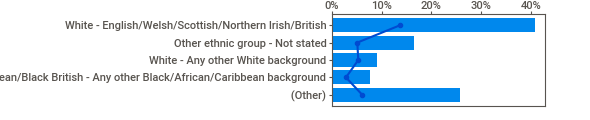
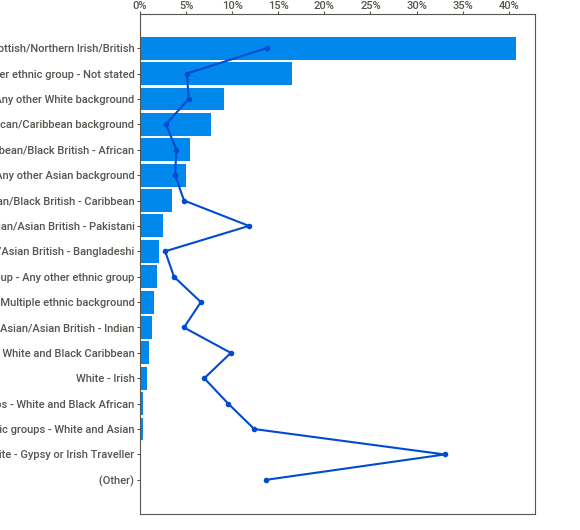
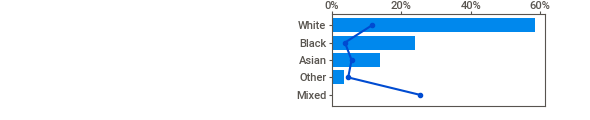
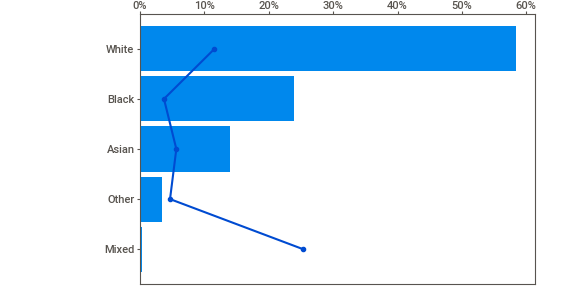
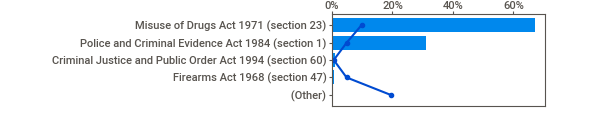
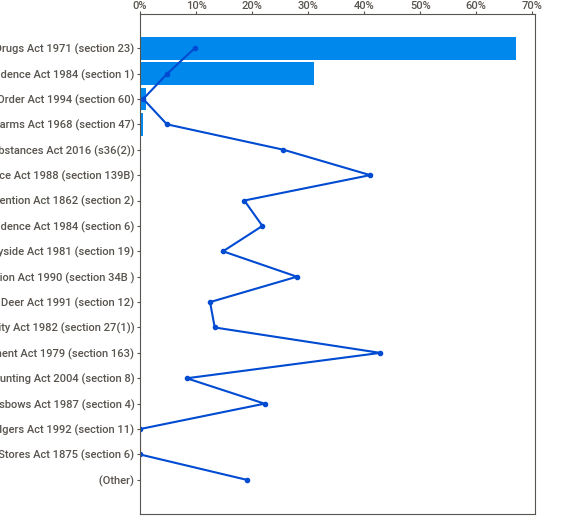
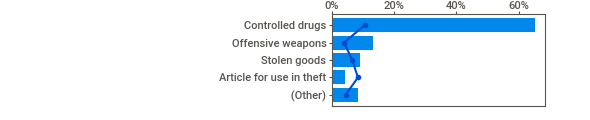
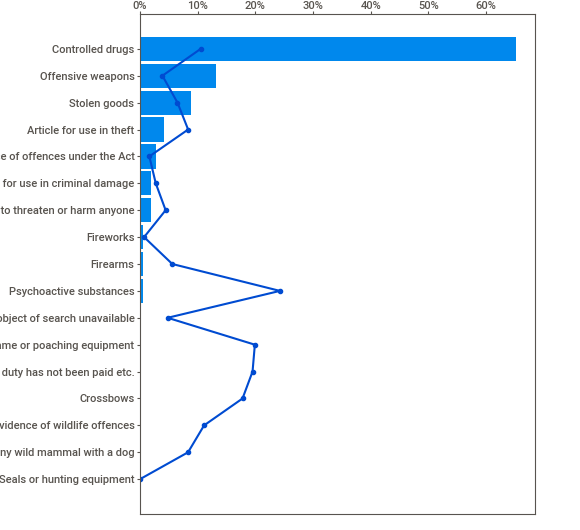
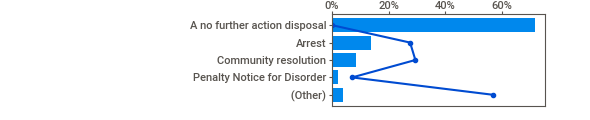
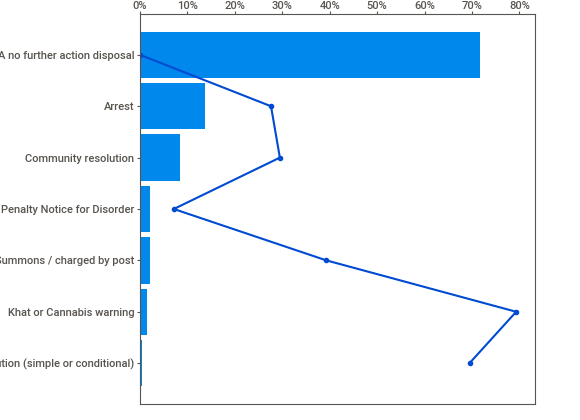
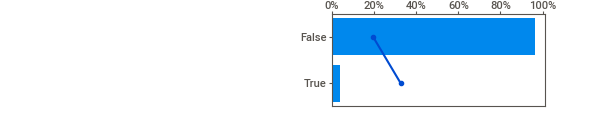
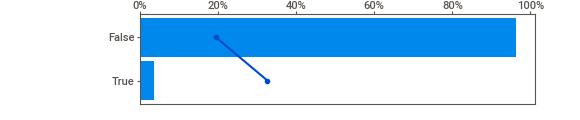
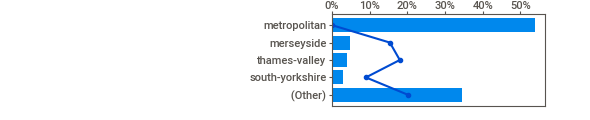
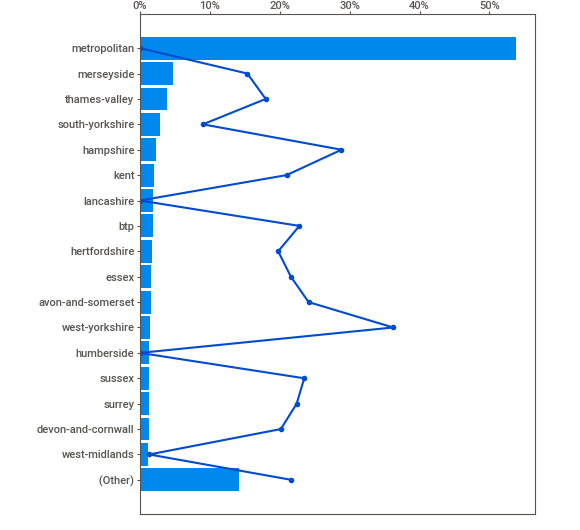
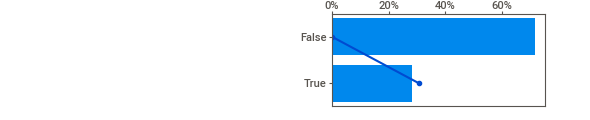
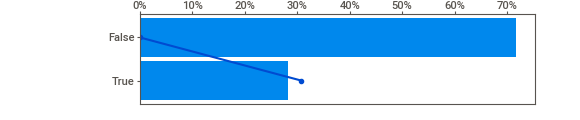
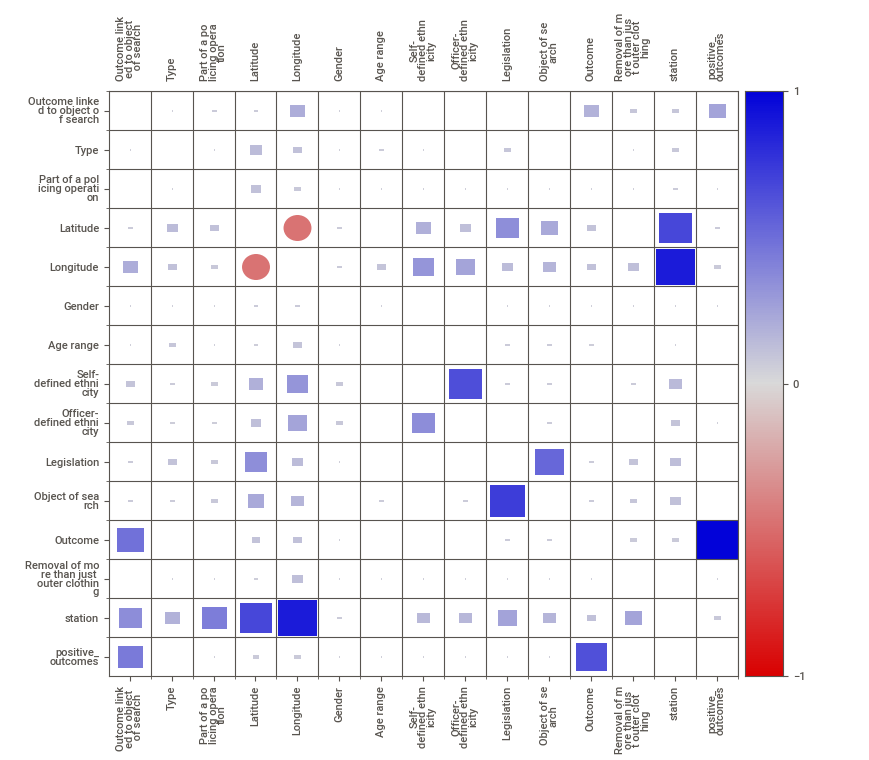
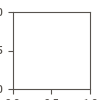

In [119]:
sweetviz.DataframeReport(data, target_feature_name='Outcome linked to object of search').show_notebook()